In [20]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeVigoV2
from qiskit.providers.aer import Aer
from experiment import SparsePauliTomographyExperiment as bcexperiment
from matplotlib import pyplot as plt
from primitives.pauli import QiskitPauli
from perexperiment import PERExperiment

plt.style.use("ggplot")

backend = FakeVigoV2()

In [21]:
def executor(circuits):
    return backend.run(circuits).result().get_counts()

In [22]:
qc = QuantumCircuit(5)
qc.x(1)
qc.cx(0,1)
qc.cx(3,4)
qc.draw()

q_0: ───────■──
     ┌───┐┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
q_2: ──────────
               
q_3: ──■───────
     ┌─┴─┐     
q_4: ┤ X ├─────
     └───┘

In [23]:
experiment = bcexperiment(circuits = [qc], inst_map = [0,1,2,3,4], backend = backend)

In [24]:
experiment.generate(samples = 25, single_samples = 25, depths = [2,4,16])

In [25]:
experiment.run(executor)

In [26]:
noisedataframe = experiment.analyze()

In [27]:
perexp = PERExperiment([qc], [0,1,2,3,4], noisedataframe, backend)

In [28]:
perexp.generate([0,1,2], ["IIIZZ"], 100)

In [29]:
perexp.run(executor)

In [30]:
perexp.analyze()

0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930039548
0.8137016930

In [31]:
perexp._per_runs[0]._data[QiskitPauli("IIIZZ")].get_expectations()

[-1.0289381983799988, -0.9843854334294805, -0.9889219930578286]

In [36]:
layer1, = experiment.analysis.layer_data()

<AxesSubplot:>

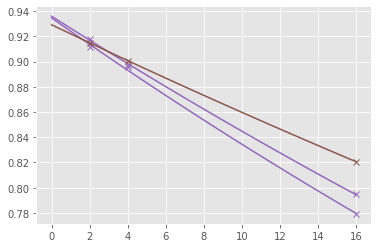

In [33]:
layer1.graph(4)

<AxesSubplot:>

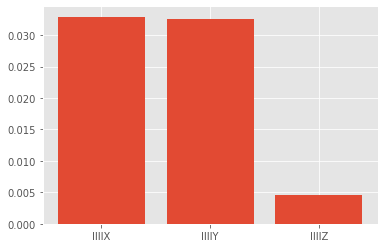

In [34]:
layer1.plot_infidelitites(0)

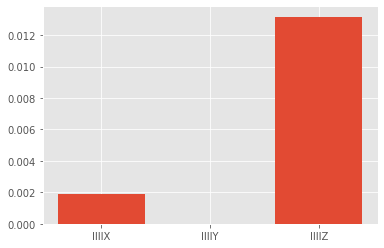

In [35]:
layer1.plot_coeffs(0)